In [1]:
# utilities
import re
import numpy as np
import pandas as pd

In [5]:
!pip install wordcloud

In [6]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
# nltk
from nltk.stem import WordNetLemmatizer

In [14]:
!pip install scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 435.7 kB/s eta 0:00:19
                                              0.0/8.3 MB 435.7 kB/s eta 0:00:19
                                              0.0/8.3 MB 435.7 kB/s eta 0:00:19
                                              0.1/8.3 MB 252.2 kB/s eta 0:00:33
                                              0.1/8.3 MB 306.3 kB/s eta 0:00:27
                                              0.1/8.3 MB 364.4 kB/s eta 0:00:23
                                              0.1/8.3 MB 364.4 kB/s eta 0:00:23
                                              0.1/8.3 MB 300.4 kB/s eta 0:00:28
                                              0.2/8.3 MB 406.9 kB/s eta 0:00:20
     -                                        0.2/8.3 MB 486.6 kB/s eta 0:00:17
     -                                        0.2/8.3 MB 4

In [15]:
# sklearn
import sklearn


In [16]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(r'C:\Users\user\Downloads\Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

C:\Users\user\AppData\Local\Temp\ipykernel_14880\2529572767.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\user\Downloads\Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)


,target,ids,date,flag,user,text
316978,0,2002511288,Tue Jun 02 04:25:34 PDT 2009,NO_QUERY,Lincoln1Echo,Fuck....can't sleep
293596,0,1996365802,Mon Jun 01 14:57:58 PDT 2009,NO_QUERY,sadies_p,My lEFT SiDE OF My M0UTH iS NUMb
907350,4,1695731560,Mon May 04 06:49:23 PDT 2009,NO_QUERY,kama_sue,"@jeiseman no, but it's tacky to Tweet about it"
345238,0,2015855287,Wed Jun 03 05:40:00 PDT 2009,NO_QUERY,Amib70,agghhh i have food poisoning
179054,0,1966162037,Fri May 29 17:14:27 PDT 2009,NO_QUERY,gcstanley,Wow what a storm we just had!!! Now no power


In [18]:
df.head()

,target,ids,date,flag,user,text
0,ï»¿0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [19]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [20]:
print('length of data is', len(df))

length of data is 1048576


In [21]:
df. shape

(1048576, 6)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  object
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [23]:
df.dtypes

target    object
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [24]:
np.sum(df.isnull().any(axis=1))

0

In [25]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1048576


In [26]:
df['target'].unique()

array(['ï»¿0', '0', 0, 4], dtype=object)

In [27]:
df['target'].nunique()

4

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (2).

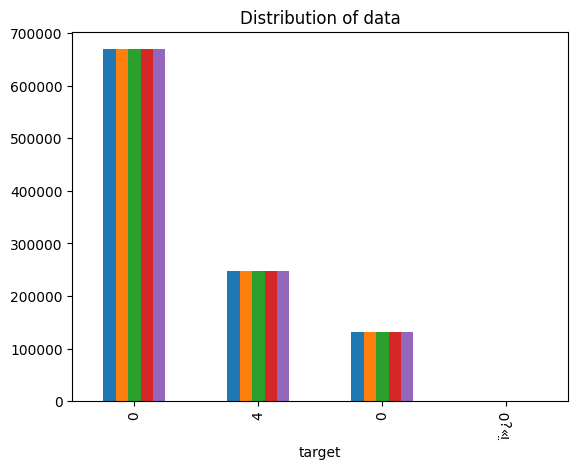

In [28]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

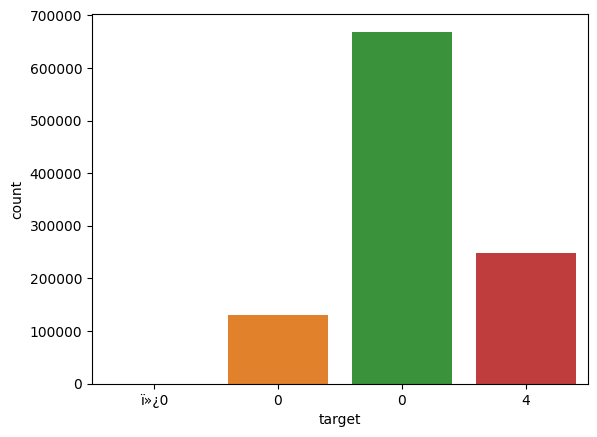

In [29]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [30]:
data=df[['text','target']]

In [31]:
data['target'] = data['target'].replace(4,1)

C:\Users\user\AppData\Local\Temp\ipykernel_14880\2499609609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [32]:
data['target'].unique()

array(['ï»¿0', '0', 0, 1], dtype=object)

In [33]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [34]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [35]:
dataset = pd.concat([data_pos, data_neg])

In [36]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

151067    @foxxfiles  you have to trust me sometimes. i ...
151068                    wish i could have stayed longer. 
151069    the rain just made everything worse. now it's ...
151070                                     he's leaving me 
151071    is chilling at coffee perk and missing her sta...
Name: text, dtype: object

In [37]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [38]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [39]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

151067      foxxfiles trust sometimes know girly but sheesh
151068                             wish could stayed longer
151069           rain made everything worse its super humid
151070                                          hes leaving
151071    chilling coffee perk missing starbucks dates l...
Name: text, dtype: object

In [40]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

151067      foxxfiles trust sometimes know girly but sheesh
151068                             wish could stayed longer
151069           rain made everything worse its super humid
151070                                          hes leaving
151071    chilling coffee perk missing starbucks dates l...
Name: text, dtype: object

In [41]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

151067      foxxfiles trust sometimes know girly but sheesh
151068                             wish could stayed longer
151069           rain made everything worse its super humid
151070                                          hes leaving
151071    chilling coffee perk missing starbucks dates l...
Name: text, dtype: object

In [42]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

151067      foxxfiles trust sometimes know girly but sheesh
151068                             wish could stayed longer
151069           rain made everything worse its super humid
151070                                          hes leaving
151071    chilling coffee perk missing starbucks dates l...
Name: text, dtype: object

In [43]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [44]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [45]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [46]:
X=data.text
y=data.target

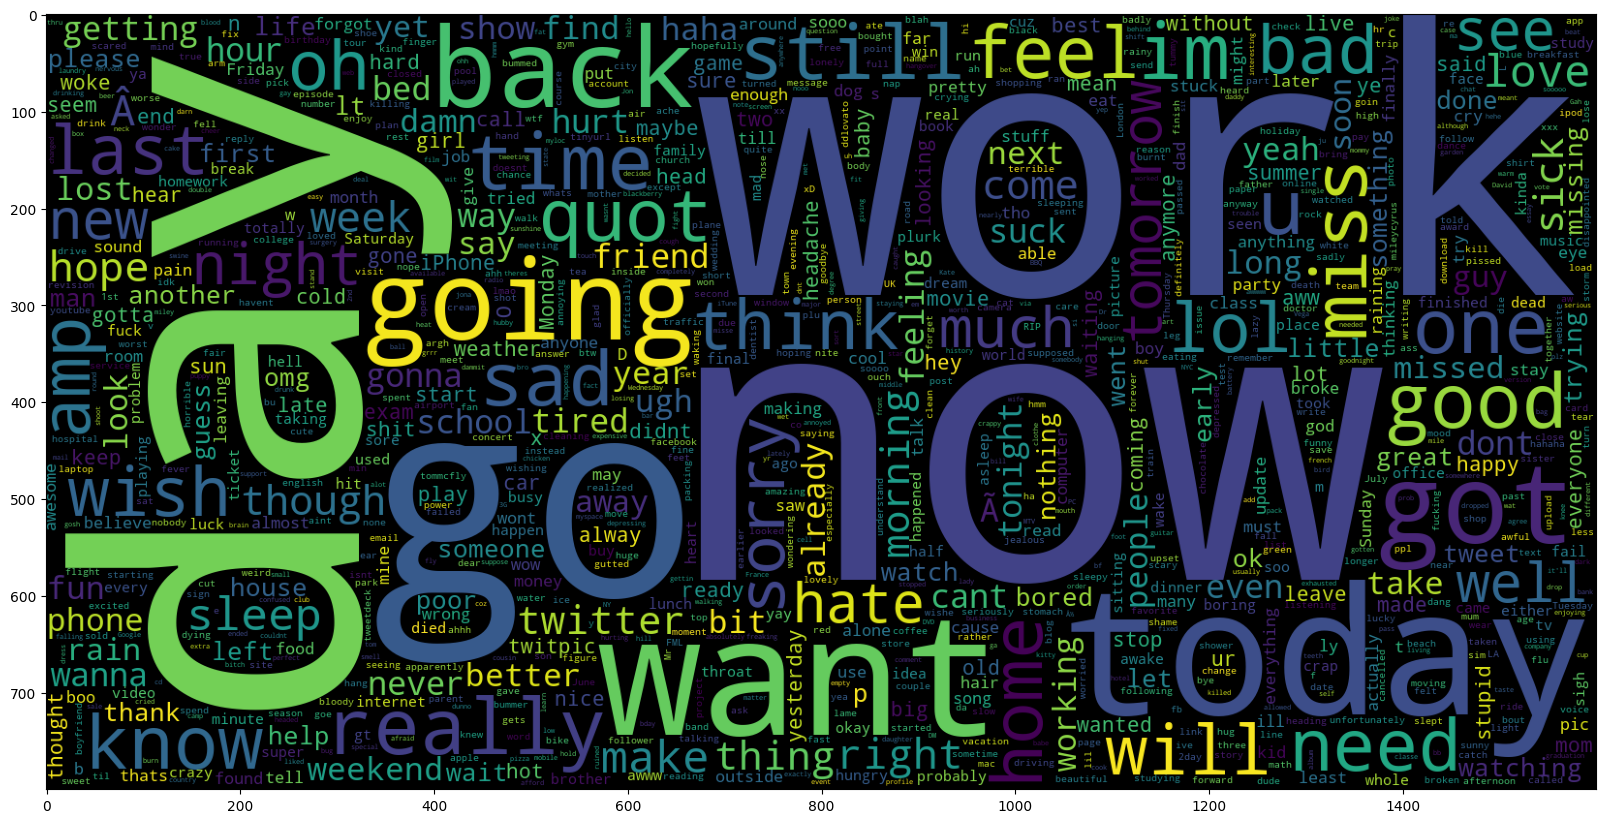

In [47]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

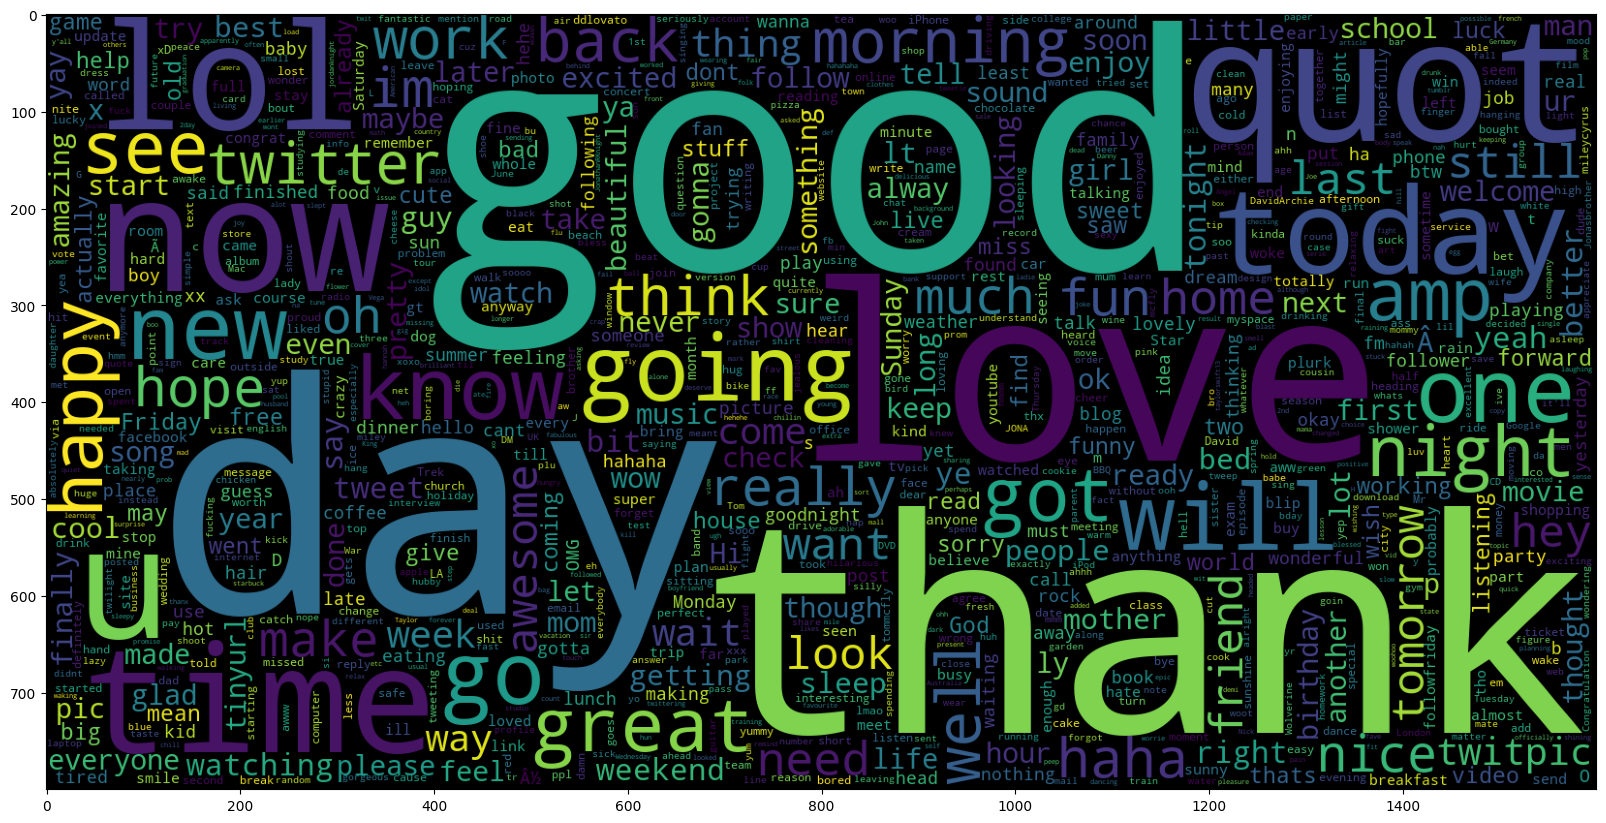

In [48]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [49]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [52]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [57]:
print('No. of feature_words: 500000')

No. of feature_words: 500000


In [58]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [72]:
def model_Evaluate(model):
# Predict values for Test dataset
 y_pred = model.predict(X_test)

In [94]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, 'y_pred'))

ValueError: Found input variables with inconsistent numbers of samples: [52429, 6]

Text(0.5, 1.0, 'Confusion Matrix')

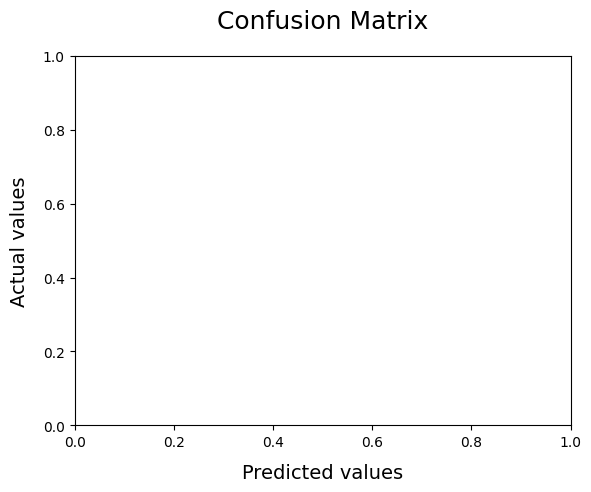

In [87]:
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20

In [96]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, 'y_pred')
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

ValueError: Found input variables with inconsistent numbers of samples: [52429, 6]

In [98]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

ValueError: Unknown label type: (array([0, 0, 0, ..., 0, 1, '0'], dtype=object),)